In [25]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

pd.set_option('display.max_columns', None)

In [2]:
# Path to the zip file
zip_file_path = '../data/movielens_100k/archive (9).zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('../data/movielens_100k/')

### Load and Explore the `u.data` File

In [4]:
# Path to the u.data file
data_file = '../data/movielens_100k/ml-100k/u.data'

# Load the dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_ratings = pd.read_csv(data_file, sep='\t', names=column_names)

# Explore the first few rows of the data
df_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Load the `u.item` File

In [7]:
# Path to the u.item file
item_file = '../data/movielens_100k/ml-100k/u.item'

# Define the column names based on the description
item_columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 
                'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 
                'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Load the item data
df_movies = pd.read_csv(item_file, sep='|', names=item_columns, encoding='ISO-8859-1')

# Explore the first few rows of the movie data
df_movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### Load the `u.user` File

In [8]:
# Path to the u.user file
user_file = '../data/movielens_100k/ml-100k/u.user'

# Define the column names based on the description
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

# Load the user data
df_users = pd.read_csv(user_file, sep='|', names=user_columns)

# Explore the first few rows of the user data
df_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Data Cleaning & Preprocessing

In [10]:
# Remove the `timestamp` from ratings
df_ratings = df_ratings.drop(columns=['timestamp'])

In [11]:
df_ratings.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [12]:
# Check for missing values in the ratings data
print("Missing values in ratings data:\n", df_ratings.isnull().sum(), "\n")

# Check for missing values in the movies data
print("Missing values in movies data:\n", df_movies.isnull().sum(), "\n")

# Check for missing values in the users data
print("Missing values in users data:\n", df_users.isnull().sum(), "\n")

Missing values in ratings data:
 user_id    0
item_id    0
rating     0
dtype: int64 

Missing values in movies data:
 movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64 

Missing values in users data:
 user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64 



**Create a list of genres for each movie**

In [15]:
# Extract genre columns and create a 'genres' column
genre_columns = df_movies.columns[6:]  # Get the genre columns
df_movies['genres'] = df_movies[genre_columns].apply(lambda x: ', '.join(x.index[x == 1]), axis=1)

# Display the updated movies data
df_movies[['movie_id', 'movie_title', 'genres']].head()

,movie_id,movie_title,genres
0,1,Toy Story (1995),"Animation, Children's, Comedy"
1,2,GoldenEye (1995),"Action, Adventure, Thriller"
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),"Action, Comedy, Drama"
4,5,Copycat (1995),"Crime, Drama, Thriller"


### Data Summary & Visualizations

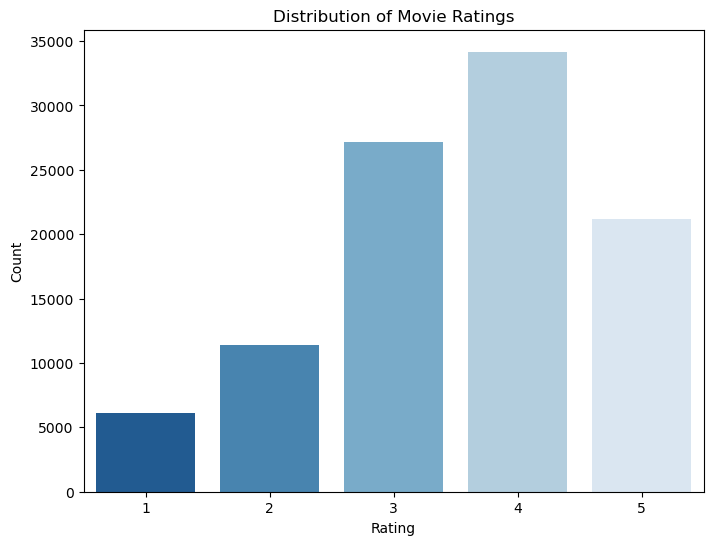

In [20]:
# Distribution fo Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_ratings, palette='Blues_r')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('../plots/ratings_distribution.png')
plt.show()

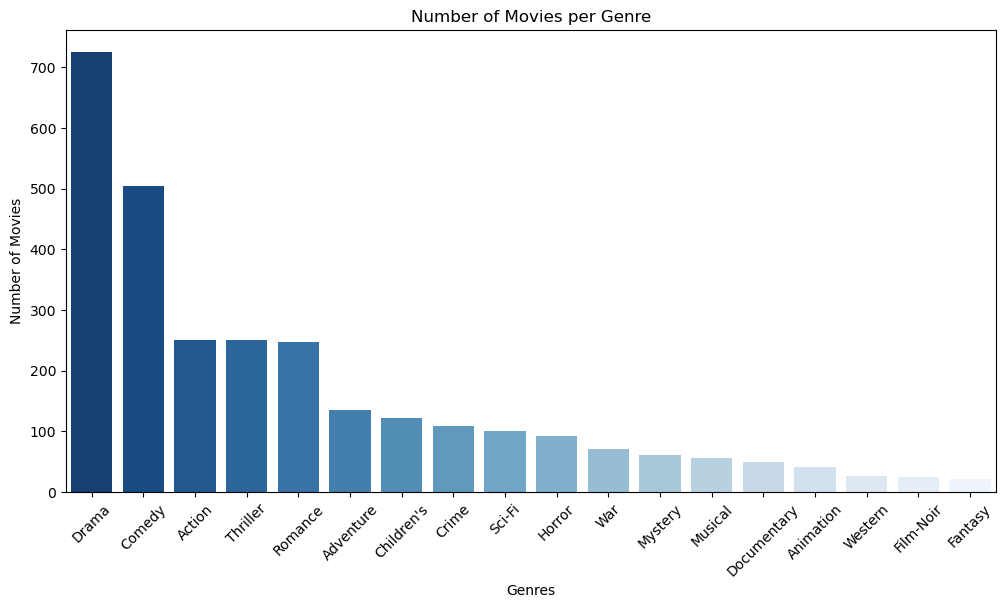

In [21]:
# Genre Distribution
genre_counts = df_movies[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Blues_r')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.savefig('../plots/genre_distribution.png')
plt.show()

### Preprocessing

In [26]:
# Function to clean movie titles (keep the title as it is but ensure no leading/trailing spaces) and keep the year
def clean_movie_title(title):
    return title.strip()

# Clean the movie titles in the content-based dataset
df_movies['movie_title'] = df_movies['movie_title'].apply(clean_movie_title)

# Clean white spaces
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.strip())

In [30]:
df_movies[['movie_id', 'movie_title', 'genres']].head()

,movie_id,movie_title,genres
0,1,Toy Story (1995),"Animation, Children's, Comedy"
1,2,GoldenEye (1995),"Action, Adventure, Thriller"
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),"Action, Comedy, Drama"
4,5,Copycat (1995),"Crime, Drama, Thriller"


### Save Dataset

In [31]:
# Define paths to save the datasets
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

# Save 'content-based' data
content_based_data = df_movies[['movie_id', 'movie_title', 'genres']]
content_based_file = os.path.join(output_dir, 'content_based_data.csv')
content_based_data.to_csv(content_based_file, index=False)

# Save 'collaborative filtering' data
collaborative_filtering_data = df_ratings
collaborative_filtering_file = os.path.join(output_dir, 'collaborative_filtering_data.csv')
collaborative_filtering_data.to_csv(collaborative_filtering_file, index=False)

# Save the combined data for hybrid recommendations
hybrid_data = pd.merge(collaborative_filtering_data, content_based_data, left_on='item_id', right_on='movie_id', how='left')
hybrid_file = os.path.join(output_dir, 'hybrid_data.csv')
hybrid_data.to_csv(hybrid_file, index=False)